In [1]:
# Importing libraries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing data

path = r'C:\Users\katro\Instacart Basket Analysis'

In [3]:
df_ords = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_filtered.pkl'))

In [4]:
# Defining a function to create age ranges flag

def age_range(row):
    if row['age'] <= 30:
        return 'Young Adult'
    elif (row['age'] >30) and (row['age'] <= 45):
        return 'Middle-Aged'
    else:
        return 'Older Adult'

In [5]:
# Creating age_group column

df_ords['age_group'] = df_ords.apply(age_range, axis=1)

In [6]:
df_ords['age_group'].value_counts()

age_group
Older Adult    17413868
Middle-Aged     7269327
Young Adult     6310294
Name: count, dtype: int64

In [7]:
df_ords.head()

,order_id,user_id,order_number,department,prices,spending_flag,frequency_flag,age,n_dependants,fam_status,income,region,age_group
0,2539329,1,1,beverages,9.0,Low spender,Regular customer,31,3,married,40423,South,Middle-Aged
1,2539329,1,1,dairy eggs,12.5,Low spender,Regular customer,31,3,married,40423,South,Middle-Aged
2,2539329,1,1,snacks,4.4,Low spender,Regular customer,31,3,married,40423,South,Middle-Aged
3,2539329,1,1,snacks,4.7,Low spender,Regular customer,31,3,married,40423,South,Middle-Aged
4,2539329,1,1,household,1.0,Low spender,Regular customer,31,3,married,40423,South,Middle-Aged


In [14]:
# Creating stacked bar chart to compare frequenct and age groups

ct = pd.crosstab(df_ords['age_group'], df_ords['frequency_flag'])

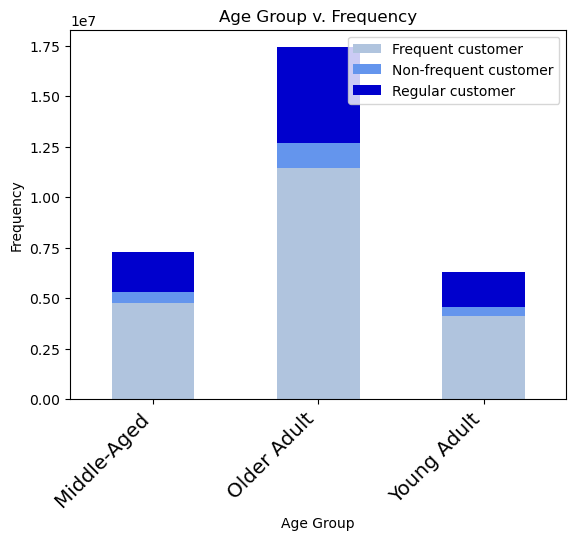

In [16]:
ax = ct.plot(kind='bar', stacked=True, rot=0, color = ['lightsteelblue', 'cornflowerblue', 'mediumblue'])
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')


plt.xlabel("Age Group")
plt.ylabel("Frequency")
plt.title("Age Group v. Frequency")
plt.legend()

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.savefig('age_frequency.png', bbox_inches='tight')

In [17]:
# Creating stacked bar chart to compare frequency within regions

ct_2 = pd.crosstab(df_ords['region'], df_ords['frequency_flag'])

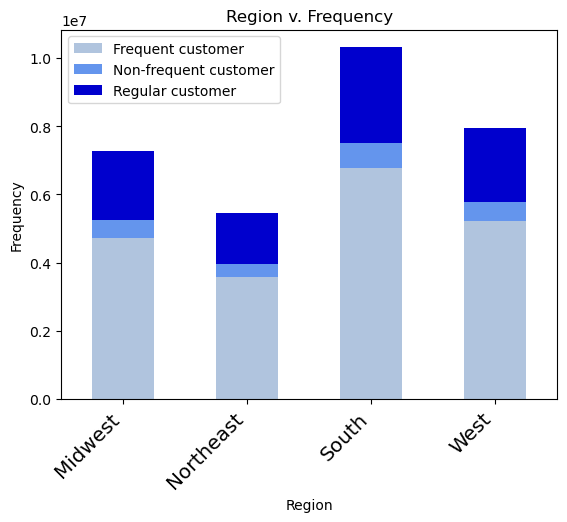

In [19]:
ax = ct_2.plot(kind='bar', stacked=True, rot=0, color = ['lightsteelblue', 'cornflowerblue', 'mediumblue'])
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')


plt.xlabel("Region")
plt.ylabel("Frequency")
plt.title("Region v. Frequency")
plt.legend()

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.savefig('region_frequency.png', bbox_inches='tight')